# 10.5.1 K-Means Clustering

The function `KMeans()` from the `sklearn` package performs K-means clustering in Pyhton. We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [ ]:
import numpy as np
np.random.seed(3)
x = np.random.standard_normal(size = (50, 2))
x[0:25, 0] += 3
x[0:25, 1] -= 4

We now perform K-means clustering with `K = 2`:

In [2]:
from sklearn.cluster import KMeans
km_out = KMeans(n_clusters = 2, n_init = 20, random_state = 2).fit(x)

The cluster assignments of the 50 observations are contained in the `labels_` attribute of the `KMeans()` object.

In [3]:
km_out.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `KMeans()`. We can plot the data, with each observation colored according to its cluster assignment:

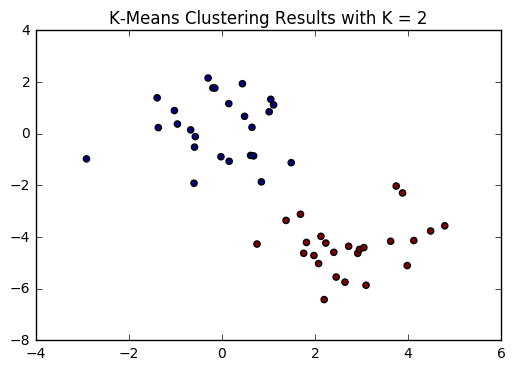

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x = x[:, 0], y = x[:, 1], c = km_out.labels_)
plt.title('K-Means Clustering Results with K = 2')
plt.show()

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed K-means clustering on this example with `K = 3`. If we do this, K-means clustering will split up the two “real” clusters, since it has no information about them:

In [5]:
km_out = KMeans(n_clusters = 3, n_init = 20, random_state = 4).fit(x)
km_out.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2])

In [6]:
km_out.cluster_centers_

array([[-0.30264894, -0.72085395],
       [ 2.75473619, -4.34258983],
       [ 0.15055483,  1.2776261 ]])

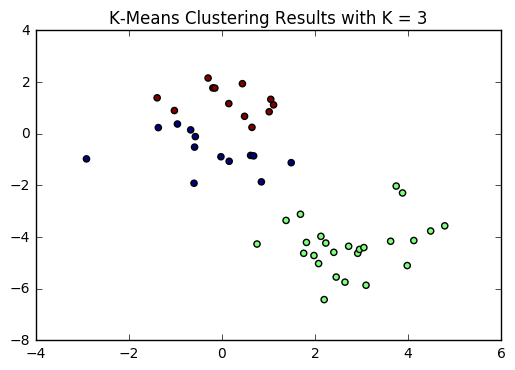

In [7]:
plt.scatter(x = x[:, 0], y = x[:, 1], c = km_out.labels_)
plt.title('K-Means Clustering Results with K = 3')
plt.show()

To run the `KMeans()` function in Python with multiple initial cluster assignments, we use the `n_init` parameter. If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `KMeans()` function will report only the best results. Here we compare using `n_init = 1`:

In [8]:
km_out = KMeans(n_clusters = 3, n_init = 1, random_state = 3).fit(x)
km_out.inertia_

82.214832348433319

to `n_init = 20` 

In [9]:
km_out = KMeans(n_clusters = 3, n_init = 20, random_state = 3).fit(x)
km_out.inertia_

82.14444621369401

Note that the `inertia_` attribute of a `KMeans()` object is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `random_state` parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

# 10.5.2 Hierarchical Clustering

The `hierarchy` package in `scipi` implements functions for hierarchical clustering and plotting in Python. In the following example we use the data from the previous section to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage.

In [10]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

hc_complete = hierarchy.linkage(x, method = 'complete', metric = 'euclidean')

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [11]:
hc_average = hierarchy.linkage(x, method = 'average', metric = 'euclidean')
hc_single = hierarchy.linkage(x, method = 'single', metric = 'euclidean')

We can now plot the dendrograms obtained using the typical functions from Pyplot. The numbers at the bottom of the plot identify each observation:

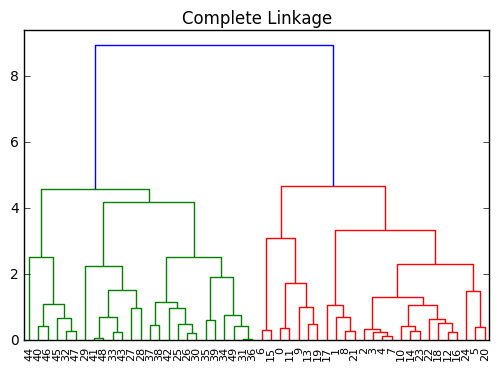

In [23]:
plt.figure()
dn = hierarchy.dendrogram(hc_complete)
plt.title('Complete Linkage')
plt.show()

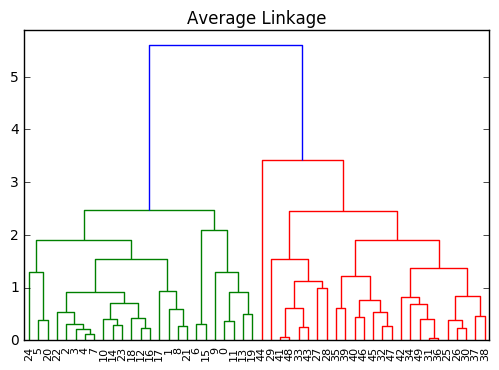

In [24]:
plt.figure()
dn = hierarchy.dendrogram(hc_average)
plt.title('Average Linkage')
plt.show()

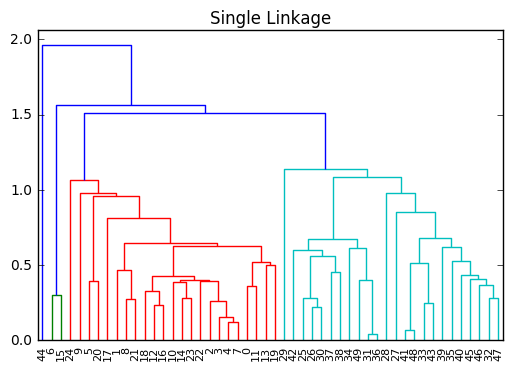

In [25]:
plt.figure()
dn = hierarchy.dendrogram(hc_single)
plt.title('Single Linkage')
plt.show()

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `fcluster()` function.

In [15]:
hierarchy.fcluster(hc_complete, 2, criterion = 'maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [16]:
hierarchy.fcluster(hc_average, 2, criterion = 'maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [17]:
hierarchy.fcluster(hc_single, 2, criterion = 'maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1], dtype=int32)

For this data, complete and average linkage generally separate the observations into their correct groups. However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons:

In [18]:
hierarchy.fcluster(hc_single, 4, criterion = 'maxclust')

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3], dtype=int32)

To scale the variables before performing hierarchical clustering of the observations, we can use the `scale()` function:

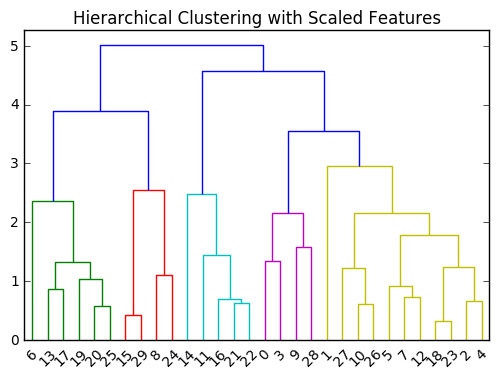

In [22]:
from sklearn.preprocessing import scale

hc_scaled = hierarchy.linkage(scale(x), method = 'complete', metric = 'euclidean')

plt.figure()
dn = hierarchy.dendrogram(hc_scaled)
plt.title('Hierarchical Clustering with Scaled Features')
plt.show()

Correlation-based distance can be computed using by setting the `metric` parameter to `correlation`. However, this only makes sense for data with at least three features since the absolute correlation between any two observations with measurements on two features is always 1. Let’s generate and cluster a three-dimensional data set:

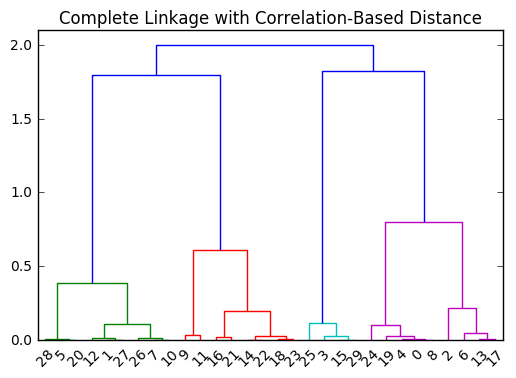

In [21]:
np.random.seed(0)
x = np.random.standard_normal(size = (30, 3))

hc_cor = hierarchy.linkage(x, method = 'complete', metric = 'correlation')

plt.figure()
dn = hierarchy.dendrogram(hc_cor)
plt.title('Complete Linkage with Correlation-Based Distance')
plt.show()

# 10.6: NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In this portion of the lab, we’ll see how hierarchical and K-means clustering compare on the NCI60 cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [26]:
import pandas as pd
nci_data = pd.read_csv('../../data/NCI60_X.csv', index_col = 0)
nci_labels = pd.read_csv('../../data/NCI60_y.csv', index_col = 0)

Each cell line is labeled with a cancer type. We’ll ignore the cancer types in performing clustering, as these are unsupervised techniques. After performing clustering, we’ll use this column to see the extent to which these cancer types agree with the results of these unsupervised techniques.

The data has 64 rows and 6,830 columns.

In [27]:
nci_data.shape

(64, 6830)

Let’s take a look at the cancer types for the cell lines:

In [28]:
nci_labels.groupby('x').count()

""
x
BREAST
CNS
COLON
K562A-repro
K562B-repro
LEUKEMIA
MCF7A-repro
MCF7D-repro
MELANOMA


# 10.6.2 Clustering the Observations of the NCI60 Data

We now proceed to hierarchically cluster the cell lines in the NCI60 data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the variables to have mean zero and standard deviation one. This step is optional, and need only be performed if we want each gene to be on the same scale:

In [29]:
sd_data = scale(nci_data)

We now perform hierarchical clustering of the observations using complete, average, and single linkage. We’ll use standard Euclidean distance as the dissimilarity measure:

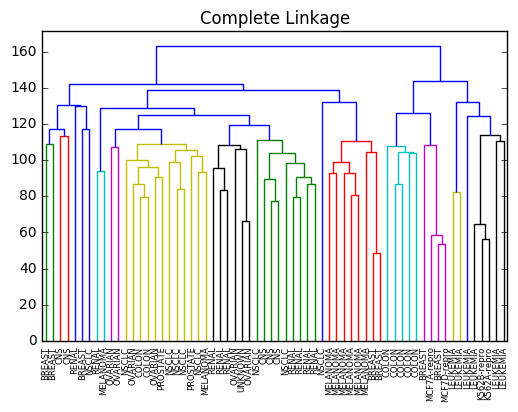

In [44]:
nci_complete = hierarchy.linkage(sd_data, method = 'complete', metric = 'euclidean')

plt.figure()
dn = hierarchy.dendrogram(nci_complete, labels = np.array(nci_labels['x']))
plt.title("Complete Linkage")
plt.show()

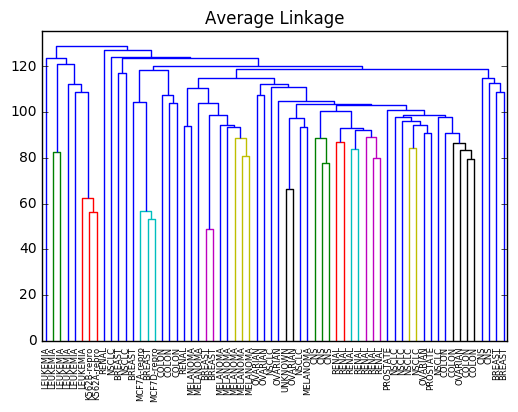

In [43]:
nci_average = hierarchy.linkage(sd_data, method = 'average', metric = 'euclidean')

plt.figure()
dn = hierarchy.dendrogram(nci_average, labels = np.array(nci_labels['x']))
plt.title("Average Linkage")
plt.show()

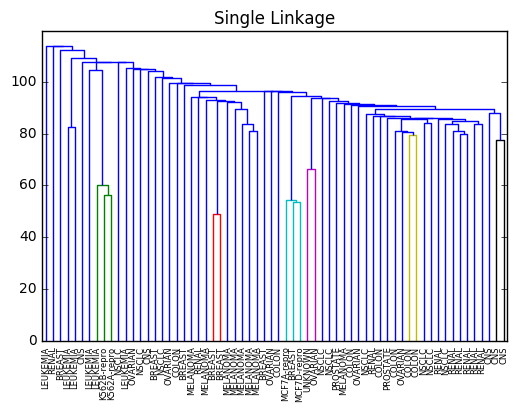

In [41]:
nci_single = hierarchy.linkage(sd_data, method = 'single', metric = 'euclidean')

plt.figure()
dn = hierarchy.dendrogram(nci_single, labels = np.array(nci_labels['x']))
plt.title("Single Linkage")
plt.show()

We see that the choice of linkage certainly does affect the results obtained. Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. For this reason, complete and average linkage are generally preferred to single linkage. Clearly cell lines within a single cancer type do tend to cluster together, although the clustering is not perfect.

Let’s use our complete linkage hierarchical clustering for the analysis. We can cut the dendrogram at the height that will yield a particular number of clusters, say 4:

In [34]:
hc_clusters = pd.DataFrame({'Label': nci_labels['x'],
                            'Cluster': hierarchy.fcluster(nci_complete, 4, criterion = 'maxclust')})

In [35]:
hc_clusters.groupby(['Label', 'Cluster']).count()

Empty DataFrame
Columns: []
Index: [(BREAST, 1), (BREAST, 2), (BREAST, 3), (CNS, 1), (CNS, 2), (COLON, 2), (COLON, 3), (K562A-repro, 4), (K562B-repro, 4), (LEUKEMIA, 4), (MCF7A-repro, 3), (MCF7D-repro, 3), (MELANOMA, 2), (NSCLC, 1), (NSCLC, 2), (OVARIAN, 2), (PROSTATE, 2), (RENAL, 1), (RENAL, 2), (UNKNOWN, 2)]

There are some clear patterns. All the leukemia cell lines fall in the same cluster, while the breast cancer cell lines are spread out over three different clusters. We can plot the cut on the dendrogram that produces these four clusters by adding a `plt.plot()` call when building the plot.

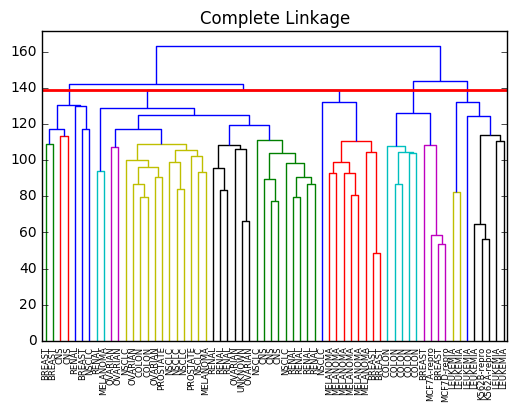

In [42]:
plt.figure()
dn = hierarchy.dendrogram(nci_complete, labels = np.array(nci_labels['x']))
plt.plot([0, 700], [139, 139], '-r', lw = 2) # the first two parameters are of the form [x1, x2], [y1, ty2]
plt.title("Complete Linkage")
plt.show()

We claimed earlier that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results. How do these NCI60 hierarchical clustering results compare to what we get if we perform K-means clustering with `K = 4`?

In [39]:
km_out = KMeans(n_clusters = 4, n_init = 20, random_state = 2).fit(sd_data)
km_clusters = km_out.labels_

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters.  Note that we will have to add one to the cluster number from KMeans since it has indexes from 0 to 3 rather than 1 to 4 as in the hierachical clustering.

In [40]:
hc_kmeans = pd.DataFrame({'HC': hc_clusters['Cluster'],
                          'KMeans': km_clusters + 1})

pd.crosstab(hc_kmeans.KMeans, hc_kmeans.HC)

HC,1,2,3,4
KMeans,,,,
1,0,4,9,0
2,7,27,0,1
3,0,0,0,7
4,0,9,0,0


We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different. Cluster 4 in K-means clustering is identical to cluster 2 in hierarchical clustering. However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 1 by hierarchical clustering, as well as all of the observations assigned to cluster 2 by hierarchical clustering.

To get credit for this lab, use a similar analysis to compare the results of your K-means clustering to the results of your hierarchical clustering with single and average linkage. What differences do you notice? Post your response to Piazza: https://piazza.com/class/igwiv4w3ctb6rg?cid = 58